# Panda Sales Analysis

The purpose of this project is to analyse some recent Sale-related trends from [the given dataset](https://github.com/EDSOfficial/Sales-Analysis) for a company that sells products globally from many different categories and sub-categories. 

Here are some questions which will be discovered and analysed to help the company make more precisely strategic decisions in the future. 
- What is the overal sales trend?
- What are the top 10 products by sales?
- Whatt are the most selling products?
- What is the most preferred ship Mode?
- Which are the most profittable category and sub-category?

## Import required libraries

In [3]:
# Data Manipulation 

import pandas as pd 

# Data Visualisation 

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns 

## Import Dataset 

In [14]:
df = pd.read_excel('Downloads/Sales-Analysis-master/superstore_sales.xlsx')

In [15]:
# First 5 rows of the dataset 

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [16]:
# Last 5 rows of the dataset 

df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [17]:
# Shape of the dataset
df.shape

(51290, 21)

In [18]:
# Column present in the dataset 

df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [19]:
# A concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
order_id          51290 non-null object
order_date        51290 non-null datetime64[ns]
ship_date         51290 non-null datetime64[ns]
ship_mode         51290 non-null object
customer_name     51290 non-null object
segment           51290 non-null object
state             51290 non-null object
country           51290 non-null object
market            51290 non-null object
region            51290 non-null object
product_id        51290 non-null object
category          51290 non-null object
sub_category      51290 non-null object
product_name      51290 non-null object
sales             51290 non-null float64
quantity          51290 non-null int64
discount          51290 non-null float64
profit            51290 non-null float64
shipping_cost     51290 non-null float64
order_priority    51290 non-null object
year              51290 non-null int64
dtypes: datetime64[ns](2), float6

In [21]:
# Check any missing values

df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [22]:
# Getting descriptive statistics summary 

df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


## Exploratory Data Analysis

<H4>Q1: What is the overall sales trend?

In [26]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [27]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [28]:
# Getting month and year from the dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime("%Y-%m"))

In [32]:
# Grouping month year

df_trend = df.groupby('month_year').sum()['sales'].reset_index()

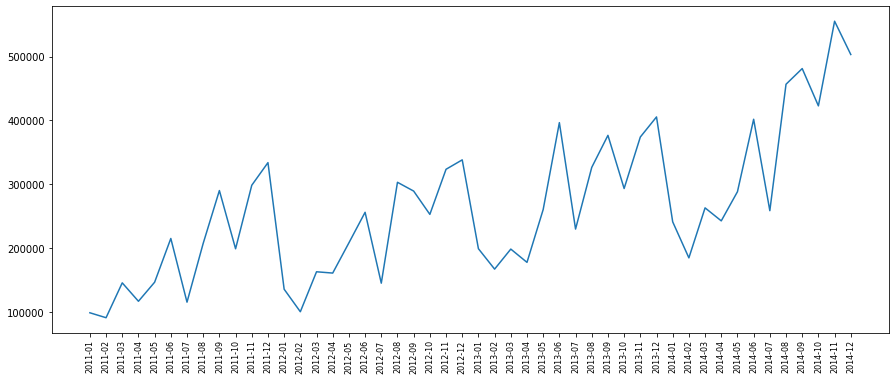

In [36]:
# Setting the figure size
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['sales'])
plt.xticks(rotation="vertical", size=8)
plt.show()

<H4> Q2: What are the top 10 products by sales?

In [48]:
# Groupping product name by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [52]:
# Sorting the number of sales for each product in descending order 
sorted_prod_sales = prod_sales.sort_values('sales', ascending=False)

In [54]:
# Top 10 products by sales

sorted_prod_sales[:10].reset_index()

,product_name,sales
0,"Apple Smart Phone, Full Size",86935.7786
1,"Cisco Smart Phone, Full Size",76441.5306
2,"Motorola Smart Phone, Full Size",73156.3030
3,"Nokia Smart Phone, Full Size",71904.5555
4,Canon imageCLASS 2200 Advanced Copier,61599.8240
5,"Hon Executive Leather Armchair, Adjustable",58193.4841
6,"Office Star Executive Leather Armchair, Adjust...",50661.6840
7,"Harbour Creations Executive Leather Armchair, ...",50121.5160
8,"Samsung Smart Phone, Cordless",48653.4600
9,"Nokia Smart Phone, with Caller ID",47877.7857


<h4> Q3: What are the most selling product?

In [73]:
# Groupping product name by quantity

best_seller = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [74]:
# Sorting the product name by quantity
sorted_best_seller = best_seller.sort_values('quantity', ascending=False)

In [76]:
# Top 10 best seller

sorted_best_seller[:10].reset_index()

,product_name,quantity
0,Staples,876
1,"Cardinal Index Tab, Clear",337
2,"Eldon File Cart, Single Width",321
3,"Rogers File Cart, Single Width",262
4,"Sanford Pencil Sharpener, Water Color",259
5,"Stockwell Paper Clips, Assorted Sizes",253
6,"Avery Index Tab, Clear",252
7,"Ibico Index Tab, Clear",251
8,"Smead File Cart, Single Width",250
9,"Stanley Pencil Sharpener, Water Color",242


<h4> Q4: What is the most preferred ship mode?

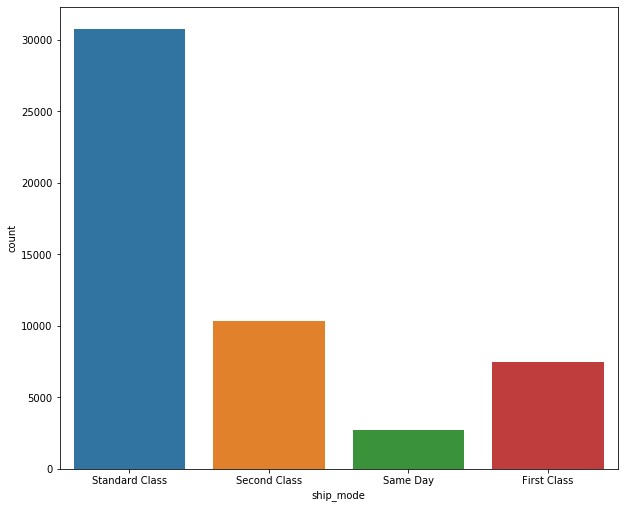

In [83]:
# Setting figure size

plt.figure(figsize=(10,8.5))

sns.countplot(df['ship_mode'])

<h4> Q5: What are the most profittable category and sub-category?

In [101]:
# Groupping category and subcategory
cat_subcat_profit = pd.DataFrame(df.groupby(['category',"sub_category"]).sum()['profit'])

In [102]:
# Sorting category and subcategory
cat_subcat_profit.sort_values('profit', ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
Office Supplies Appliances    141680.58940
Technology      Accessories   129626.30620
Office Supplies Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
Technology      Machines       58867.87300
Office Supplies Art            57953.91090
Furniture       Furnishings    46967.42550
Office Supplies Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Tables        -64083.38870